In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import scipy.stats as stats
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# import the chicago data file
city_data = pd.read_csv('Data/chicago_data.csv')
roll_avg = pd.read_csv('Data/rolling_AVG.csv')
city_data

date date_formatted    month  cases_total  \
0    2020-03-07T00:00:00.000       3/7/2020  03 -Mar            3   
1    2020-03-08T00:00:00.000       3/8/2020  03 -Mar            3   
2    2020-03-09T00:00:00.000       3/9/2020  03 -Mar            5   
3    2020-03-10T00:00:00.000      3/10/2020  03 -Mar           11   
4    2020-03-11T00:00:00.000      3/11/2020  03 -Mar           12   
..                       ...            ...      ...          ...   
225  2020-10-18T00:00:00.000     10/18/2020  10 -Oct          314   
226  2020-10-19T00:00:00.000     10/19/2020  10 -Oct         1115   
227  2020-10-20T00:00:00.000     10/20/2020  10 -Oct         1098   
228  2020-10-21T00:00:00.000     10/21/2020  10 -Oct          949   
229  2020-10-22T00:00:00.000     10/22/2020  10 -Oct          505   

     deaths_total  hospitalizations_total  cases_age_0_17  cases_age_18_29  \
0               0                       3               0                0   
1               0                       9               0                0   
2               0                       3               3                0   
3               0                       8               1                2   
4               0                       9               0                3   
..            ...                     ...             ...              ...   
225             0                      23              24               76   
226             2                      22             144              262   
227             3                      21             148              279   
228             4                      15              90              292   
229             2                      17              47              110   

     cases_age_30_39  cases_age_40_49  ...  people_not_positive_age_unknown  \
0                  0                0  ...                                0   
1                  1                1  ...                                0   
2                  0                0  ...                                0   
3                  3                2  ...                                1   
4                  1                3  ...                                1   
..               ...              ...  ...                              ...   
225               78               57  ...                                2   
226              235              160  ...                                1   
227              211              182  ...                                3   
228              199              143  ...                                1   
229              121               88  ...                                4   

     people_not_positive_female  people_not_positive_male  \
0                             8                         2   
1                            18                        23   
2                            35                        22   
3                            30                        29   
4                            32                        10   
..                          ...                       ...   
225                        1011                       974   
226                        2756                      2507   
227                        2773                      2446   
228                        2880                      2443   
229                        2521                      2103   

     people_not_positive_gender_unknown  people_not_positive_latinx  \
0                                     0                           1   
1                                     1                           3   
2                                     2                           7   
3                                     2                          10   
4                                     5                           8   
..                                  ...                         ...   
225                                   8                         223   
226     

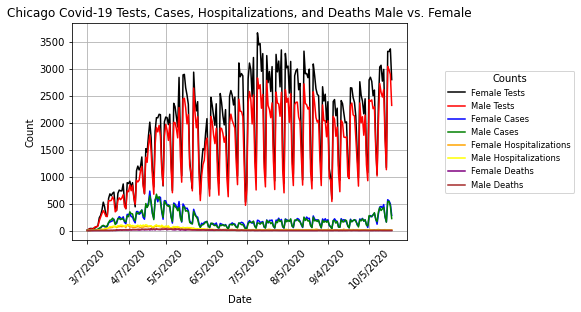

In [21]:
# Generate a plot Chicago COVID 19 Daily Tests, Positive Cases, Hospitalizations, and Deaths (Male vs. Female)
plt.plot(city_data['date_formatted'], city_data['people_tested_female'], c='black', label = 'Female Tests')
plt.plot(city_data['date_formatted'], city_data['people_tested_male'], c='r', label = 'Male Tests')
plt.plot(city_data['date_formatted'], city_data['cases_female'], c='b', label = 'Female Cases')
plt.plot(city_data['date_formatted'], city_data['cases_male'], c='g', label = 'Male Cases')
plt.plot(city_data['date_formatted'], city_data['hospitalizations_female'], c='orange', label = 'Female Hospitalizations')
plt.plot(city_data['date_formatted'], city_data['hospitalizations_male'], c='yellow', label = 'Male Hospitalizations')
plt.plot(city_data['date_formatted'], city_data['deaths_female'], c='purple', label = 'Female Deaths')
plt.plot(city_data['date_formatted'], city_data['deaths_male'], c='brown', label = 'Male Deaths')
plt.title("Chicago Covid-19 Tests, Cases, Hospitalizations, and Deaths Male vs. Female")
plt.xlabel("Date")
plt.ylabel("Count")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='Counts')
plt.grid()
plt.show()

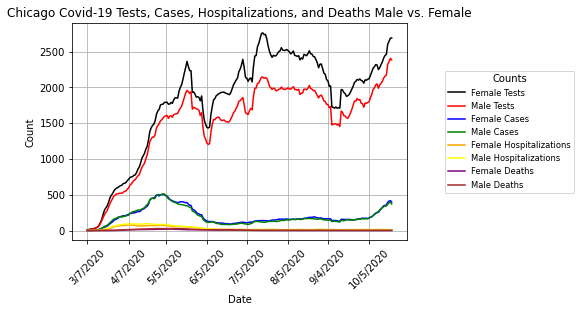

In [22]:
# Generate a plot of the 7-day rolling average of Chicago COVID 19 Daily Tests, Positive Cases, Hospitalizations, and Deaths (Male vs. Female)
plt.plot(roll_avg['date_formatted'], roll_avg['people_tested_female'], c='black', label = 'Female Tests')
plt.plot(roll_avg['date_formatted'], roll_avg['people_tested_male'], c='red', label = 'Male Tests')
plt.plot(roll_avg['date_formatted'], roll_avg['cases_female'], c='b', label = 'Female Cases')
plt.plot(roll_avg['date_formatted'], roll_avg['cases_male'], c='g', label = 'Male Cases')
plt.plot(roll_avg['date_formatted'], roll_avg['hospitalizations_female'], c='orange', label = 'Female Hospitalizations')
plt.plot(roll_avg['date_formatted'], roll_avg['hospitalizations_male'], c='yellow', label = 'Male Hospitalizations')
plt.plot(roll_avg['date_formatted'], roll_avg['deaths_female'], c='purple', label = 'Female Deaths')
plt.plot(roll_avg['date_formatted'], roll_avg['deaths_male'], c='brown', label = 'Male Deaths')
plt.title("Chicago Covid-19 Tests, Cases, Hospitalizations, and Deaths Male vs. Female")
plt.xlabel("Date")
plt.ylabel("Count")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='Counts')
plt.grid()
plt.show()

In [23]:
# Generate a new DataFrame from the rolling average data and calculate the Positivity, Hospitalization, and Case Mortality Rates (Male vs. Female) for plotting
f_m_df = pd.DataFrame(roll_avg[['date_formatted','day','month','cases_female','cases_male','people_tested_female','people_tested_male','hospitalizations_female','hospitalizations_male','deaths_female','deaths_male']])
f_m_df['Pos Rate_female'] = f_m_df['cases_female']/f_m_df['people_tested_female']*100
f_m_df['Pos Rate_male'] = f_m_df['cases_male']/f_m_df['people_tested_male']*100
f_m_df['Hosp Rate_female'] = f_m_df['hospitalizations_female']/f_m_df['cases_female']*100
f_m_df['Hosp Rate_male'] = f_m_df['hospitalizations_male']/f_m_df['cases_male']*100
f_m_df['Case Mortality_female'] = f_m_df['deaths_female']/f_m_df['cases_female']*100
f_m_df['Case Mortality_male'] = f_m_df['deaths_male']/f_m_df['cases_male']*100
f_m_df

date_formatted        day    month  cases_female  cases_male  \
0         3/7/2020   Saturday  03 -Mar      0.571429    0.428571   
1         3/8/2020     Sunday  03 -Mar      0.714286    0.714286   
2         3/9/2020     Monday  03 -Mar      1.142857    1.000000   
3        3/10/2020    Tuesday  03 -Mar      2.285714    1.428571   
4        3/11/2020  Wednesday  03 -Mar      2.714286    2.714286   
..             ...        ...      ...           ...         ...   
225     10/18/2020     Sunday  10 -Oct    356.714286  341.285714   
226     10/19/2020     Monday  10 -Oct    394.857143  369.428571   
227     10/20/2020    Tuesday  10 -Oct    411.142857  385.714286   
228     10/21/2020  Wednesday  10 -Oct    417.714286  397.714286   
229     10/22/2020   Thursday  10 -Oct    398.571429  372.142857   

     people_tested_female  people_tested_male  hospitalizations_female  \
0               11.000000            8.142857                 1.285714   
1               13.714286           11.571429                 1.571429   
2               18.285714           14.571429                 1.428571   
3               20.857143           17.285714                 1.857143   
4               22.428571           17.285714                 2.285714   
..                    ...                 ...                      ...   
225           2464.285714         2174.285714                12.000000   
226           2604.142857         2323.571429                11.857143   
227           2645.142857         2360.142857                11.285714   
228           2688.571429         2407.285714                11.428571   
229           2692.571429         2385.142857                11.285714   

     hospitalizations_male  deaths_female  deaths_male  Pos Rate_female  \
0                 2.000000       0.000000     0.000000         5.194805   
1                 2.714286       0.000000     0.000000         5.208333   
2                 3.000000       0.000000     0.000000         6.250000   
3                 3.285714       0.000000     0.000000        10.958904   
4                 3.571429       0.000000     0.000000        12.101911   
..                     ...            ...          ...              ...   
225              11.285714       1.142857     1.285714        14.475362   
226               9.571429       0.857143     1.428571        15.162653   
227               9.285714       0.857143     1.285714        15.543314   
228               8.571429       0.857143     1.428571        15.536663   
229               8.857143       0.857143     1.428571        14.802632   

     Pos Rate_male  Hosp Rate_female  Hosp Rate_male  Case Mortality_female  \
0         5.263158        225.000000      466.666666               0.000000   
1         6.172840        220.000000      380.000000               0.000000   
2         6.862745        125.000000      300.000000               0.000000   
3         8.264463         81.250000      230.000000               0.000000   
4        15.702479         84.210526      131.578947               0.000000   
..             ...               ...             ...                    ...   
225      15.696452          3.364037        3.306823               0.320384   
226      15.899170          3.002894        2.590874               0.217077   
227      16.342836          2.744962        2.407407               0.208478   
228      16.521275          2.735978        2.155172               0.205198   
229      15.602540          2.831541        2.380038               0.215054   

     Case Mortality_male  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.000000  
4               0.000000  
..                   ...  
225             0.376727  
226             0.386698  
227             0.333333  
228             0.359195  
229             0.383877  

[230 rows x 17 columns]

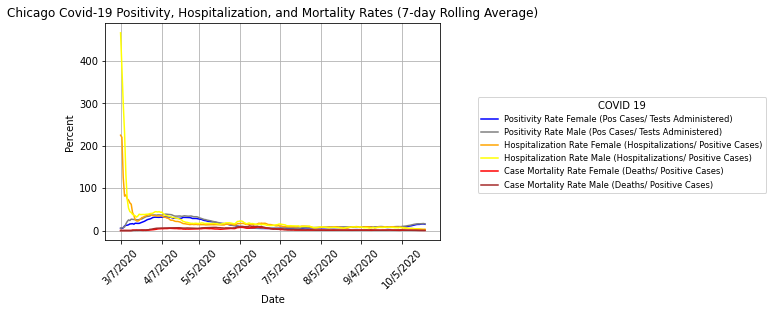

In [24]:
# Plot the Positivity, Hospitalization, and Case Mortality Rates
plt.plot(f_m_df['date_formatted'], f_m_df['Pos Rate_female'], c='b', label = 'Positivity Rate Female (Pos Cases/ Tests Administered)')
plt.plot(f_m_df['date_formatted'], f_m_df['Pos Rate_male'], c='gray', label = 'Positivity Rate Male (Pos Cases/ Tests Administered)')
plt.plot(f_m_df['date_formatted'], f_m_df['Hosp Rate_female'], c='orange',label = 'Hospitalization Rate Female (Hospitalizations/ Positive Cases)')
plt.plot(f_m_df['date_formatted'], f_m_df['Hosp Rate_male'], c='yellow',label = 'Hospitalization Rate Male (Hospitalizations/ Positive Cases)')
plt.plot(f_m_df['date_formatted'], f_m_df['Case Mortality_female'], c='r',label = 'Case Mortality Rate Female (Deaths/ Positive Cases)')
plt.plot(f_m_df['date_formatted'], f_m_df['Case Mortality_male'], c='brown',label = 'Case Mortality Rate Male (Deaths/ Positive Cases)')
plt.title("Chicago Covid-19 Positivity, Hospitalization, and Mortality Rates (7-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.2), fontsize='small', title='COVID 19')
plt.grid()
plt.show()

In [25]:
merging_df = pd.DataFrame(roll_avg[['date_formatted']])
cleaned_data = pd.merge(merging_df, city_data, how='inner', on='date_formatted')

In [26]:
# Generate a new DataFrame from the rolling average data and calculate the Positivity, Hospitalization, and Case Mortality Rates (Male vs. Female) for plotting
m_f_df = pd.DataFrame(cleaned_data[['date_formatted','day','month','cases_female','cases_male','people_tested_female','people_tested_male','hospitalizations_female','hospitalizations_male','deaths_female','deaths_male']])
m_f_df['Pos Rate_female'] = m_f_df['cases_female']/m_f_df['people_tested_female']*100
m_f_df['Pos Rate_male'] = m_f_df['cases_male']/m_f_df['people_tested_male']*100
m_f_df['Hosp Rate_female'] = m_f_df['hospitalizations_female']/m_f_df['cases_female']*100
m_f_df['Hosp Rate_male'] = m_f_df['hospitalizations_male']/m_f_df['cases_male']*100
m_f_df['Case Mortality_female'] = m_f_df['deaths_female']/m_f_df['cases_female']*100
m_f_df['Case Mortality_male'] = m_f_df['deaths_male']/m_f_df['cases_male']*100
m_f_df

date_formatted        day    month  cases_female  cases_male  \
0         3/7/2020   Saturday  03 -Mar             3           0   
1         3/8/2020     Sunday  03 -Mar             1           2   
2         3/9/2020     Monday  03 -Mar             3           2   
3        3/10/2020    Tuesday  03 -Mar             8           3   
4        3/11/2020  Wednesday  03 -Mar             3           9   
..             ...        ...      ...           ...         ...   
225     10/18/2020     Sunday  10 -Oct           157         156   
226     10/19/2020     Monday  10 -Oct           572         541   
227     10/20/2020    Tuesday  10 -Oct           551         540   
228     10/21/2020  Wednesday  10 -Oct           494         455   
229     10/22/2020   Thursday  10 -Oct           282         222   

     people_tested_female  people_tested_male  hospitalizations_female  \
0                      11                   2                        1   
1                      19                  25                        3   
2                      38                  24                        1   
3                      38                  32                        4   
4                      35                  19                        4   
..                    ...                 ...                      ...   
225                  1168                1130                       10   
226                  3328                3048                       12   
227                  3324                2986                       11   
228                  3374                2898                        9   
229                  2803                2325                        9   

     hospitalizations_male  deaths_female  deaths_male  Pos Rate_female  \
0                        2              0            0        27.272727   
1                        6              0            0         5.263158   
2                        2              0            0         7.894737   
3                        4              0            0        21.052632   
4                        5              0            0         8.571429   
..                     ...            ...          ...              ...   
225                     13              0            0        13.441781   
226                     10              0            2        17.187500   
227                     10              1            2        16.576414   
228                      6              2            2        14.641375   
229                      8              1            1        10.060649   

     Pos Rate_male  Hosp Rate_female  Hosp Rate_male  Case Mortality_female  \
0         0.000000         33.333333             inf               0.000000   
1         8.000000        300.000000      300.000000               0.000000   
2         8.333333         33.333333      100.000000               0.000000   
3         9.375000         50.000000      133.333333               0.000000   
4        47.368421        133.333333       55.555556               0.000000   
..             ...               ...             ...                    ...   
225      13.805310          6.369427        8.333333               0.000000   
226      17.749344          2.097902        1.848429               0.000000   
227      18.084394          1.996370        1.851852               0.181488   
228      15.700483          1.821862        1.318681               0.404858   
229       9.548387          3.191489        3.603604               0.354610   

     Case Mortality_male  
0                    NaN  
1               0.000000  
2               0.000000  
3               0.000000  
4               0.000000  
..                   ...  
225             0.000000  
226             0.369686  
227             0.370370  
228             0.439560  
229             0.450450  

[230 rows x 17 columns]

In [27]:
# Calculate Female Summary Statistics
female_stats = pd.DataFrame(m_f_df[['people_tested_female','cases_female','Pos Rate_female','hospitalizations_female','Hosp Rate_female','deaths_female','Case Mortality_female']])
testf = female_stats['people_tested_female'].sum()
posf = female_stats['cases_female'].sum()
hospf = female_stats['hospitalizations_female'].sum()
mortf = female_stats['deaths_female'].sum()
pos_ratef = female_stats['cases_female'].sum()/female_stats['people_tested_female'].sum()*100
hosp_ratef = female_stats['hospitalizations_female'].sum()/female_stats['cases_female'].sum()*100
case_mort_ratef = female_stats['deaths_female'].sum()/female_stats['cases_female'].sum()*100
print(f'In the city of Chicago since 15 Mar 2020, {testf} COVID 19 tests have been administered to Females.')
print ('With {:0} positive results for a Positivity Rate of {:.2f}%'.format(posf, pos_ratef))
print ('There have been {:0} COVID 19 related hospitalizations for a Hospitalization Rate of {:.2f}%'.format(hospf, hosp_ratef))
print ('There have been {:0} COVID 19 related deaths for a Case Mortality Rate of {:.2f}%'.format(mortf, case_mort_ratef))

In the city of Chicago since 15 Mar 2020, 423325 COVID 19 tests have been administered to Females.
With 47577 positive results for a Positivity Rate of 11.24%
There have been 6236 COVID 19 related hospitalizations for a Hospitalization Rate of 13.11%
There have been 1254 COVID 19 related deaths for a Case Mortality Rate of 2.64%


In [28]:
# Calculate Male Summary Statistics
male_stats = pd.DataFrame(m_f_df[['people_tested_male','cases_male','Pos Rate_male','hospitalizations_male','Hosp Rate_male','deaths_male','Case Mortality_male']])
testm = male_stats['people_tested_male'].sum()
posm = male_stats['cases_male'].sum()
hospm = male_stats['hospitalizations_male'].sum()
mortm = male_stats['deaths_male'].sum()
pos_ratem = male_stats['cases_male'].sum()/male_stats['people_tested_male'].sum()*100
hosp_ratem = male_stats['hospitalizations_male'].sum()/male_stats['cases_male'].sum()*100
case_mort_ratem = male_stats['deaths_male'].sum()/male_stats['cases_male'].sum()*100
print(f'In the city of Chicago since 15 Mar 2020, {testm} COVID 19 tests have been administered to Males.')
print ('With {:0} positive results for a Positivity Rate of {:.2f}%'.format(posm, pos_ratem))
print ('There have been {:0} COVID 19 related hospitalizations for a Hospitalization Rate of {:.2f}%'.format(hospm, hosp_ratem))
print ('There have been {:0} COVID 19 related deaths for a Case Mortality Rate of {:.2f}%'.format(mortm, case_mort_ratem))

In the city of Chicago since 15 Mar 2020, 354272 COVID 19 tests have been administered to Males.
With 45577 positive results for a Positivity Rate of 12.86%
There have been 7118 COVID 19 related hospitalizations for a Hospitalization Rate of 15.62%
There have been 1782 COVID 19 related deaths for a Case Mortality Rate of 3.91%


In [29]:
female_stats.describe()

people_tested_female  cases_female  Pos Rate_female  \
count            230.000000    230.000000       230.000000   
mean            1840.543478    206.856522        13.297792   
std              951.801824    144.627790         9.258694   
min               11.000000      1.000000         3.435583   
25%              983.750000    113.250000         6.216163   
50%             2015.500000    182.000000         8.577459   
75%             2632.250000    252.750000        19.192590   
max             3672.000000    733.000000        36.413313   

       hospitalizations_female  Hosp Rate_female  deaths_female  \
count               230.000000        230.000000     230.000000   
mean                 27.113043         17.662011       5.452174   
std                  23.817085         23.745231       6.281940   
min                   1.000000          1.785714       0.000000   
25%                  11.000000          7.589378       1.000000   
50%                  15.000000         12.159091       3.000000   
75%                  46.500000         20.072492       9.000000   
max                 109.000000        300.000000      26.000000   

       Case Mortality_female  
count             230.000000  
mean                2.853371  
std                 3.334201  
min                 0.000000  
25%                 0.470596  
50%                 1.764111  
75%                 4.255345  
max                21.428571

In [30]:
male_stats.describe()

people_tested_male  cases_male  Pos Rate_male  hospitalizations_male  \
count          230.000000   230.00000     230.000000             230.000000   
mean          1540.313043   198.16087      15.429229              30.947826   
std            775.324379   139.29575      11.361975              30.736759   
min              2.000000     0.00000       0.000000               2.000000   
25%            840.250000   101.25000       6.982558              10.000000   
50%           1732.000000   168.50000       9.433741              14.000000   
75%           2160.500000   248.75000      23.384639              49.000000   
max           3048.000000   675.00000      47.368421             108.000000   

       Hosp Rate_male  deaths_male  Case Mortality_male  
count      230.000000   230.000000           229.000000  
mean              inf     7.747826             3.969487  
std               NaN     9.188319             4.283350  
min          1.318681     0.000000             0.000000  
25%          7.236203     1.000000             0.787402  
50%         12.816942     3.000000             2.380952  
75%         25.279851    12.000000             6.122449  
max               inf    35.000000            26.315789

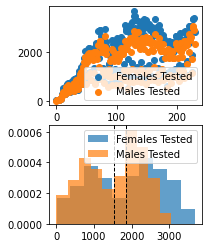

In [31]:
# Scatter Plot of Data
population1 = m_f_df['people_tested_female']
population2 = m_f_df['people_tested_male']
plt.subplot(2, 2, 1)
plt.scatter(range(len(population1)), population1, label="Females Tested")
plt.scatter(range(len(population2)), population2, label="Males Tested")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 2, 3)
plt.hist(population1, 10, density=True, alpha=0.7, label="Females Tested")
plt.hist(population2, 10, density=True, alpha=0.7, label="Males Tested")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [32]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=3.70897698993053, pvalue=0.0002347176216904497)

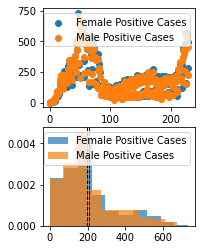

In [33]:
# Scatter Plot of Data
population3 = m_f_df['cases_female']
population4 = m_f_df['cases_male']
plt.subplot(2, 2, 2)
plt.scatter(range(len(population3)), population3, label="Female Positive Cases")
plt.scatter(range(len(population4)), population4, label="Male Positive Cases")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 2, 4)
plt.hist(population3, 10, density=True, alpha=0.7, label="Female Positive Cases")
plt.hist(population4, 10, density=True, alpha=0.7, label="Male Positive Cases")
plt.axvline(population3.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population4.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [34]:
stats.ttest_ind(population3, population4, equal_var=False)

Ttest_indResult(statistic=0.6567545708242557, pvalue=0.5116690591982505)

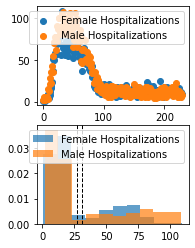

In [35]:
# Scatter Plot of Data
population5 = m_f_df['hospitalizations_female']
population6 = m_f_df['hospitalizations_male']
plt.subplot(2, 2, 1)
plt.scatter(range(len(population5)), population5, label="Female Hospitalizations")
plt.scatter(range(len(population6)), population6, label="Male Hospitalizations")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 2, 3)
plt.hist(population5, 10, density=True, alpha=0.7, label="Female Hospitalizations")
plt.hist(population6, 10, density=True, alpha=0.7, label="Male Hospitalizations")
plt.axvline(population5.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population6.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [36]:
stats.ttest_ind(population5, population6, equal_var=False)

Ttest_indResult(statistic=-1.4956449153468359, pvalue=0.13547783730869203)

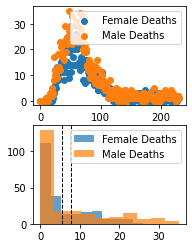

In [44]:
# Scatter Plot of Data
population7 = m_f_df['deaths_female']
population8 = m_f_df['deaths_male']
plt.subplot(2, 2, 2)
plt.scatter(range(len(population7)), population7, label="Female Deaths")
plt.scatter(range(len(population8)), population8, label="Male Deaths")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 2, 4)
plt.hist(population7, 10, density=False, alpha=0.7, label="Female Deaths")
plt.hist(population8, 10, density=False, alpha=0.7, label="Male Deaths")
plt.axvline(population7.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population8.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [45]:
stats.ttest_ind(population7, population8, equal_var=False)

Ttest_indResult(statistic=-3.1279184049965094, pvalue=0.0018877875259595037)